In [4]:
import pandas as pd
from matplotlib import pyplot as plt

import shap

from sklearn.linear_model import LinearRegression, LogisticRegression


PATH_PROJECT = "/home/yoshraf/projects/mestrado/"

# Loading the Data for Regression
X_train = pd.read_parquet(f"{PATH_PROJECT}data/how_far/X_train.parquet")
X_test = pd.read_parquet(f"{PATH_PROJECT}data/how_far/X_test.parquet")
y_train = pd.read_parquet(f"{PATH_PROJECT}data/how_far/y_train.parquet").values
y_test = pd.read_parquet(f"{PATH_PROJECT}data/how_far/y_test.parquet").values

## SHAP in Linear Regression

In [16]:
# Fit a simple linear model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train.columns[i], "=", model.coef_[0][i].round(4))
print(f"Intercept: {model.intercept_[0]}")

Model coefficients:

Idade = 19.4335
Total de viagens da pessoa = -545.7671
loc_origem_count_parada = 8.5336
loc_origem_count_ilum_std = -3.073
loc_origem_dist_metro = 0.1269
loc_origem_dist_trem = -0.3563
loc_origem_dist_term = 0.0448
loc_origem_dist_ciclo = 0.1836
loc_origem_ACC_TI_A_E_60M = -0.0004
loc_origem_ACC_TI_A_L_TP_ = 2.2566
per Quantidade de automóveis = 666.3527
per Quantidade de motocicletas = 811.9354
per Quantidade de bicicletas = -341.6225
per Renda familiar mensal = -0.0982
Situação familiar_Conjugê/ companheiro(a) = 314.0904
Situação familiar_Filho(a)/ enteado(a) = -363.2657
Situação familiar_Pessoa responsável = 429.8171
Situação familiar__outros_ = -380.6419
Gênero_Masculino = 548.6101
Intercept: 6931.30718959196


In [22]:
y_train.mean()

4187.011943796672

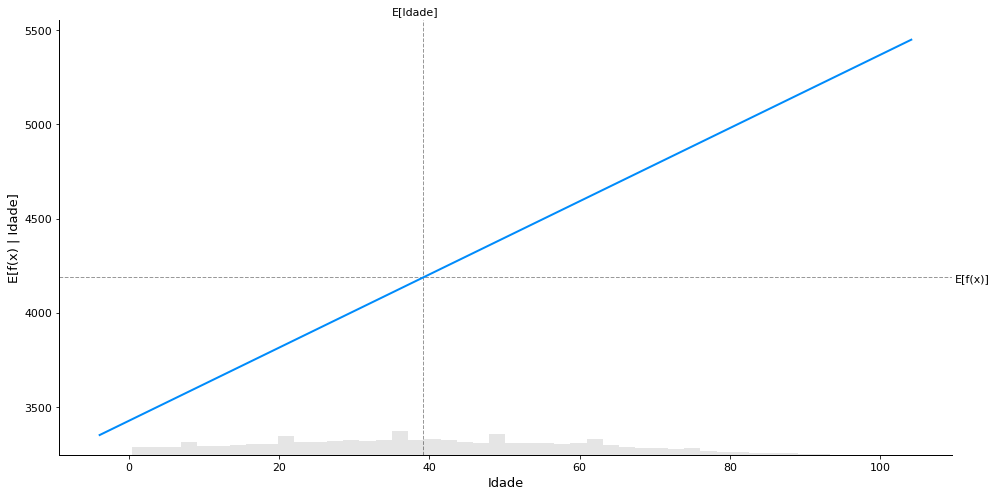

In [8]:
fig, ax = plt.subplots(1, figsize=(16,8))
shap.plots.partial_dependence(
    "Idade", model.predict, X_train, ice=False,
    model_expected_value=True, feature_expected_value=True, ax=ax
)

In [17]:
X100 = shap.utils.sample(X_train, 100)

In [18]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model, X100)
shap_values = explainer(X100)

.values =
-571.3460945037706

.base_values =
4157.93937799866

.data =
11.0


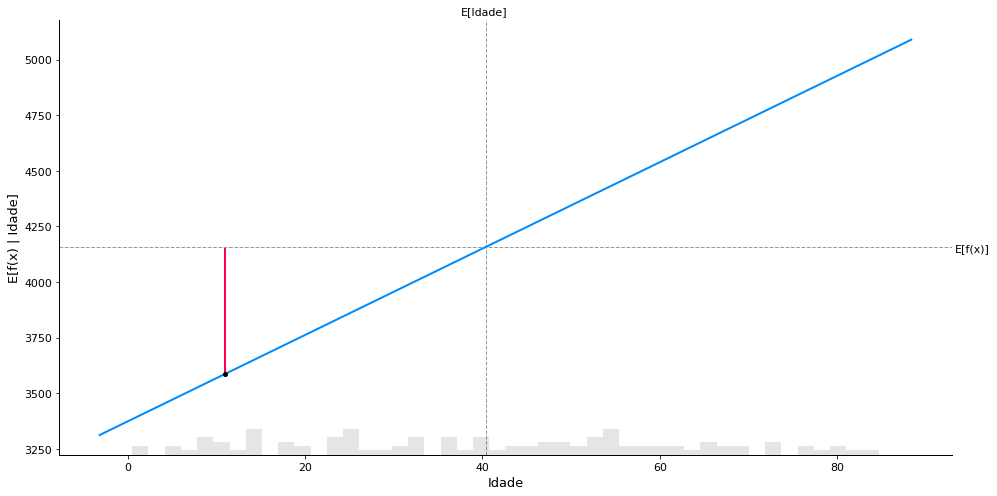

In [21]:
# make a standard partial dependence plot
sample_ind = 18
print(shap_values[sample_ind,"Idade"])

fig, ax = plt.subplots(1, figsize=(16,8))
shap.partial_dependence_plot(
    "Idade", model.predict, X100, model_expected_value=True,
    feature_expected_value=True, ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:], ax=ax
)

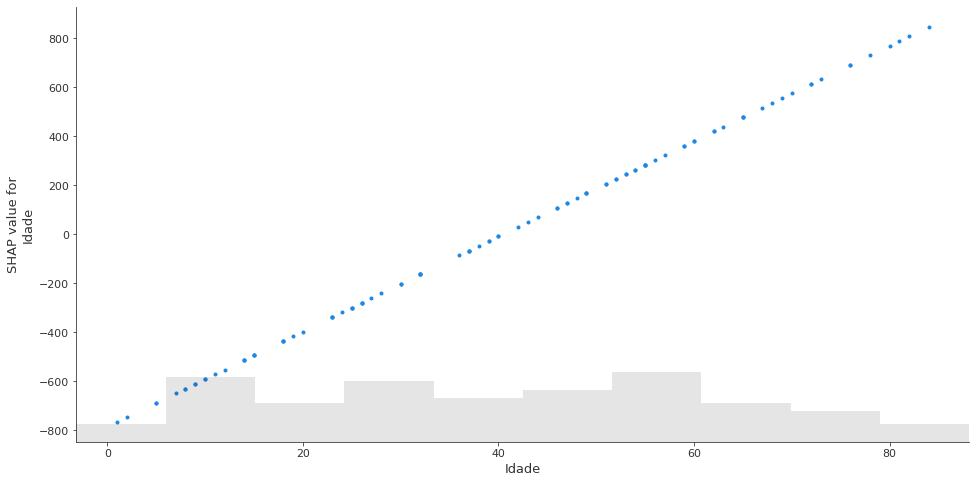

In [23]:
fig, ax = plt.subplots(1, figsize=(16,8))
shap.plots.scatter(shap_values[:,"Idade"], ax=ax)

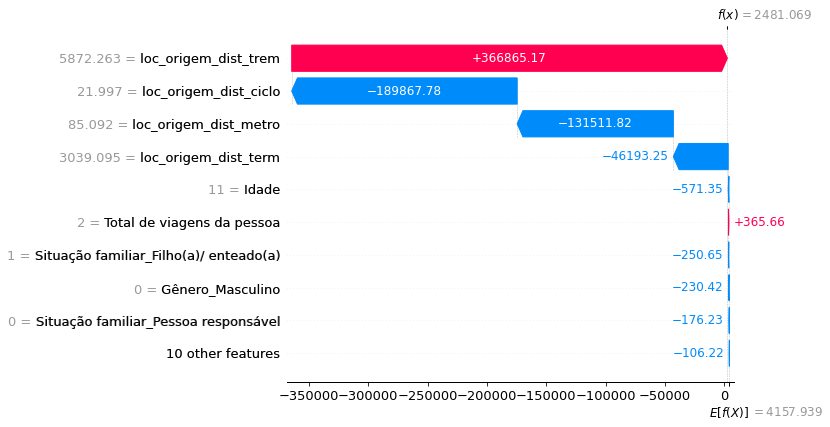

In [25]:
shap.waterfall_plot(shap_values[sample_ind], 10)

## Logistic Regression

In [27]:
# a classic adult census dataset price dataset
X_adult,y_adult = shap.datasets.adult()

# a simple linear logistic model
model_adult = LogisticRegression(max_iter=1000)
model_adult.fit(X_adult, y_adult)

def model_adult_proba(x):
    return model_adult.predict_proba(x)[:,1]
def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:,1] - p[:,0]

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [28]:
for i in range(X_adult.shape[1]):
    print(X_adult.columns[i], "=", model_adult.coef_[0][i])

Age = 0.004471566399002053
Workclass = -0.19766178894750364
Education-Num = 0.21498669396861605
Marital Status = -0.4809744650129452
Occupation = 0.031229445775908245
Relationship = 0.4715516102338776
Race = -0.3356531503403166
Sex = 1.279265439218296
Capital Gain = 0.0003386512816565894
Capital Loss = 0.0007284346760210238
Hours per week = 0.007442206208893113
Country = -0.029365753079434287


(<Figure size 1152x576 with 4 Axes>,
 <AxesSubplot:xlabel='Capital Gain', ylabel='E[f(x) | Capital Gain]'>)

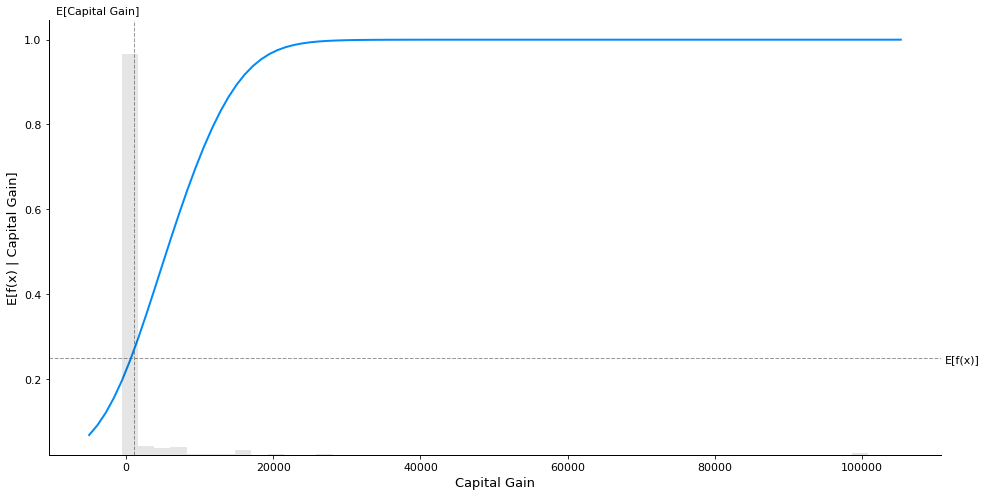

In [31]:
fig, ax = plt.subplots(1, figsize=(16,8))
shap.partial_dependence_plot(
    "Capital Gain", model_adult_proba, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False, ax=ax
)

(<Figure size 1152x576 with 4 Axes>,
 <AxesSubplot:xlabel='Age', ylabel='E[f(x) | Age]'>)

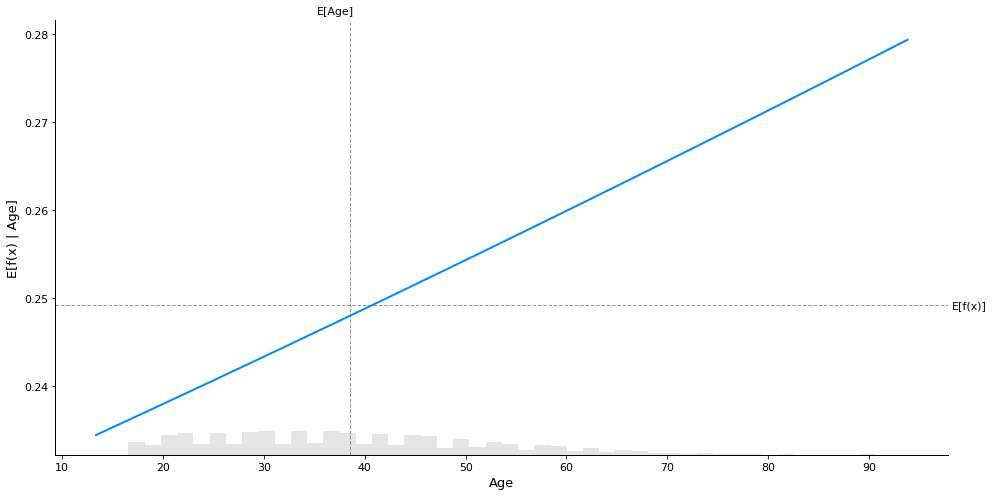

In [33]:
fig, ax = plt.subplots(1, figsize=(16,8))
shap.partial_dependence_plot(
    "Age", model_adult_proba, X_adult, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False, ax=ax
)

In [34]:
explainer = shap.Explainer(model_adult_proba, X_adult[:500])
shap_values_adult = explainer(X_adult[:500])

Permutation explainer: 501it [00:52,  7.80it/s]                         


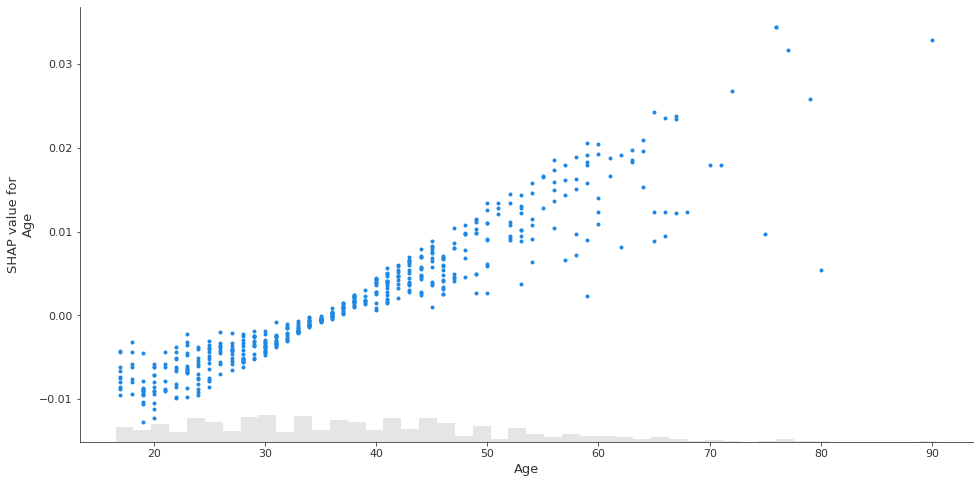

In [36]:
fig, ax = plt.subplots(1, figsize=(16,8))
shap.plots.scatter(shap_values_adult[:,"Age"], ax=ax)

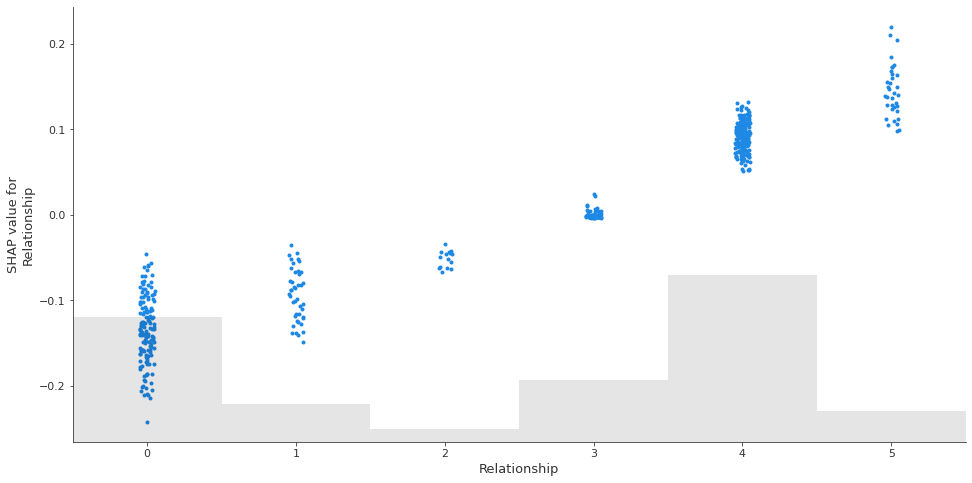

In [37]:
fig, ax = plt.subplots(1, figsize=(16,8))
shap.plots.scatter(shap_values_adult[:,"Relationship"], ax=ax)

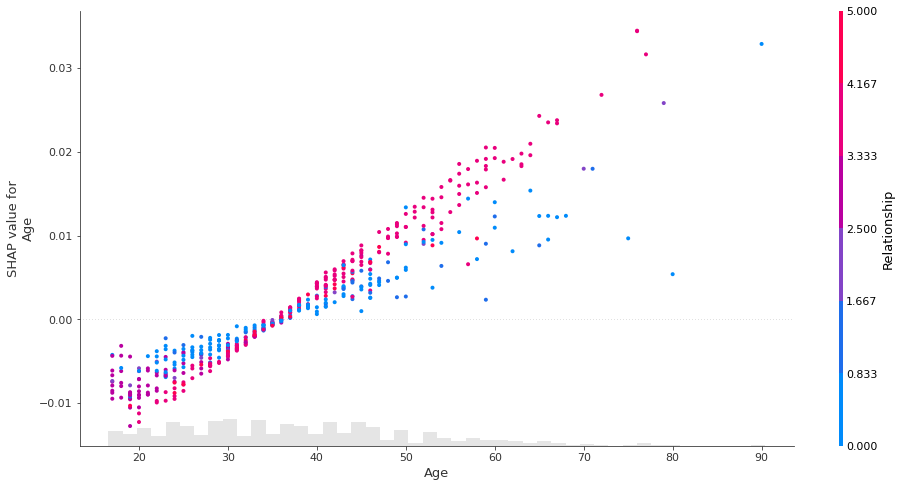

In [38]:
fig, ax = plt.subplots(1, figsize=(16,8))
shap.plots.scatter(shap_values_adult[:,"Age"], color=shap_values_adult[:,"Relationship"], ax=ax)

In [39]:
# compute the SHAP values for the linear model
explainer_log_odds = shap.Explainer(model_adult_log_odds, X_adult[:500])
shap_values_adult_log_odds = explainer_log_odds(X_adult[:500])

Permutation explainer: 501it [00:42,  8.39it/s]                         


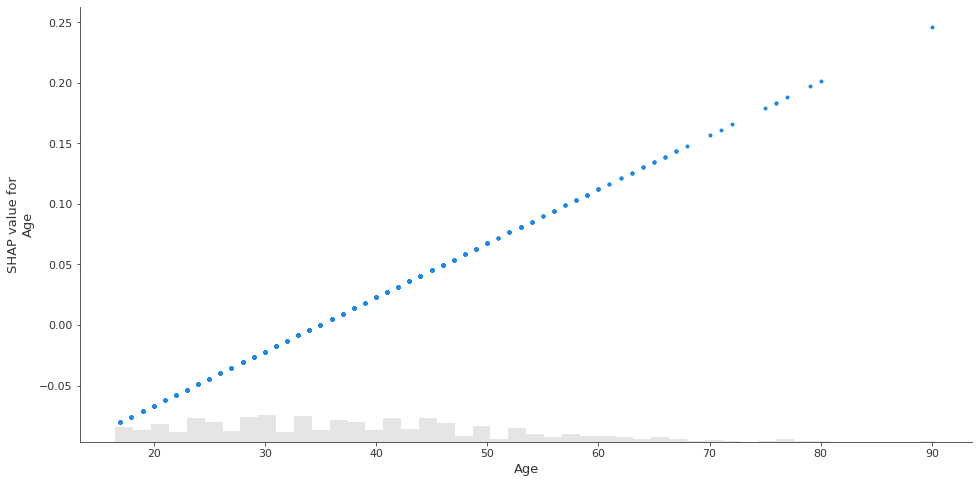

In [40]:
fig, ax = plt.subplots(1, figsize=(16,8))
shap.plots.scatter(shap_values_adult_log_odds[:,"Age"], ax=ax)

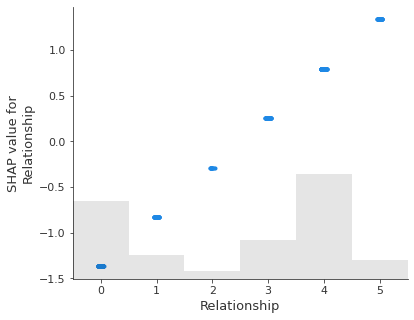

In [61]:
shap.plots.scatter(shap_values_adult_log_odds[:,"Relationship"])